In [2]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import mglearn
print("mglearn version: {}".format(mglearn.__version__))
import matplotlib.pyplot as plt

%matplotlib inline

Python version: 3.6.0 |Continuum Analytics, Inc.| (default, Dec 23 2016, 12:22:00) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
pandas version: 0.19.2
matplotlib version: 1.5.3
NumPy version: 1.11.3
SciPy version: 0.18.1
IPython version: 5.1.0
scikit-learn version: 0.18.1
mglearn version: 0.1.3


# 1 Supervised Learning

> Remember that supervised learning is used whenever we want to predict a certain
outcome from a given input, and we have examples of input/output pairs. We build a
machine learning model from these input/output pairs, which comprise our training
set. Our goal is to make accurate predictions for new, never-before-seen data. Supervised
learning often requires **human effort to build the training set**, but afterward
automates and often speeds up an otherwise laborious or infeasible task.

## 1.1 Supervised Learning Categories
Two major forms of supervised learning:
- Classification
- Regression

For **classification**, there are two possible forms:
> Classification is sometimes separated into **binary classification**,
which is the special case of distinguishing between exactly two classes, and **multiclass
classification**, which is classification between more than two classes. You can think of
binary classification as trying to answer a yes/no question.


For **regression**, the model tries to predict a continuous target value:
>For regression tasks, the goal is to predict a continuous number, or a floating-point
number in programming terms (or real number in mathematical terms).

> An easy way to distinguish between classification and regression tasks is to ask
whether there is some kind of continuity in the output. If there is continuity between
possible outcomes, then the problem is a regression problem.

## 1.2 Overfitting vs. Underfitting

> Building a model that is too complex for the amount of
information we have, as our novice data scientist did, is called **overfitting**. Overfitting
occurs when you fit a model too closely to the particularities of the training set and
obtain a model that works well on the training set but is not able to generalize to new
data.

> Choosing
too simple a model is called **underfitting**.

In order to strike a balance between overfitting and underfitting, we need to find a **sweet spot** in the model complexity vs. accuray for training and generalization.

On the other hand, we should be aware that larget dataset size itself will lead to bigger model complexity, turning the sweet spot further right on the complexity spectrum. 

> In the real world, you often have the ability to decide how
much data to collect, which might be more beneficial than tweaking and tuning your
model. Never underestimate the power of more data.

### Sample Datasets

**Dataset One:** cancer database

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [4]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [5]:
print("Sample counts per class:\n{}".format(
        {n: v for n, v in zip(cancer.target_names,
                             np.bincount(cancer.target))}))
# format() includes n:v in the form of zip(n, v)

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [6]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


**Dataset Two:** Boston Housing

In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


## 1.3 k-Nearest Neighbors

> The k-NN algorithm is arguably the simplest machine learning algorithm. Building
the model consists only of storing the training dataset. To make a prediction for a
new data point, the algorithm finds the closest data points in the training dataset—its
“nearest neighbors.”

The **simplest** version is to choose one closest point of a new unlabeled data to give the predicted target. This is 1-NN.

For more completicated modelling, we can choose *k* nearest neighbors (i.e. k-NN) and conduct *voting* to determine the result. The *voting* involves counting the frequency of different label options for the k points and give the most frequent label to the new data point.

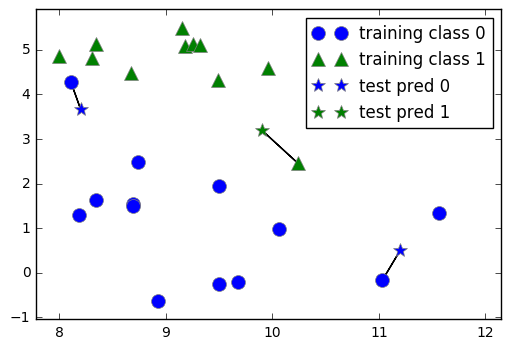

In [14]:
# 1-NN
mglearn.plots.plot_knn_classification(n_neighbors=1)


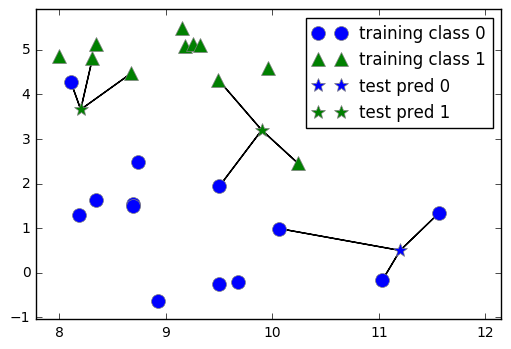

In [15]:
# 3-NN
mglearn.plots.plot_knn_classification(n_neighbors=3)

### 1.3.1 Steps to apply a k-NN model

**First** we create a training set and a testing set.

In [16]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
# Use the textbook package to create a sample data set

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
# Create the training and testing sets

**Second** we instantiate a k-NN class and fit with our training set.

In [18]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
# Instantiate a k-NN model with 3 nearest neighbors

clf.fit(X_train, y_train)
# Fit the model, clf, to the training set. For k-NN, it's simply
# storing the data

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

**Third** we make a prediction based on the test set (i.e. X_test)

In [19]:
print("Test set predictions: {}".format(clf.predict(X_test)))
# We calculate the predictions for y_test with the clf model

Test set predictions: [1 0 1 0 1 0 0]


**Fourth** we evaluate the accuracy of the model by comparing the predictions with *"correct answers"*.

In [27]:
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


The model has an accuracy of 86%.

### 1.3.2 Analyzing KNeighborsClassifier

To further examine the effectiveness of k-NN models, we should check out the **decision boundary** of k-NN models on the same dataset but with different k values. Below we will check the visualizations of 1-NN to 9-NN.

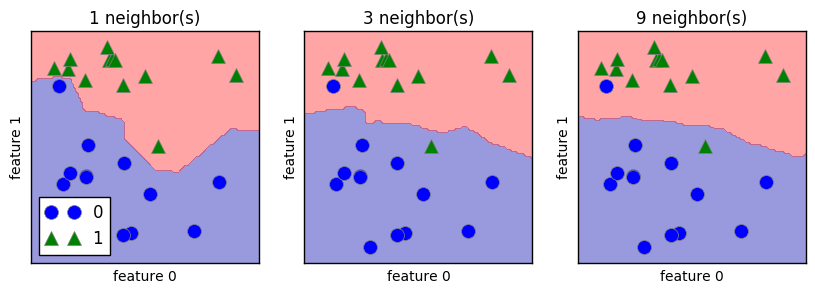

In [32]:
fig, axes = plt.subplots(1, 3, figsize = (10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In the case of *k-NN* models, the more neighbors used, the simpler the model is (represented by the smoother boundry for higher k value above).

### 1.3.3 kNN accuracy on Breast Cancer data

We now test the kNN model on the real world **breast cancer dataset**.

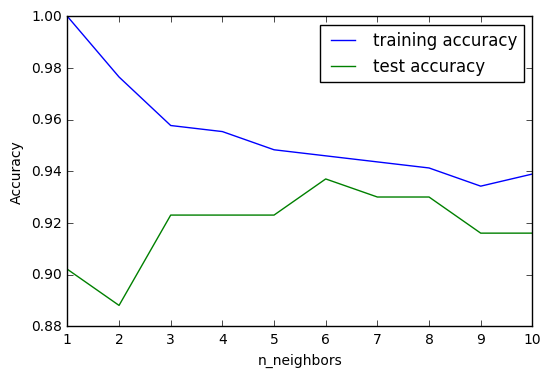

In [33]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target,
    random_state=66)
# Create training and testing datasets

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings,
         training_accuracy, label="training accuracy")
plt.plot(neighbors_settings,
        test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

From above graph we can observe that the accuracy on the test set is best around k=6. Another thing to be noted is that since kNN models is the most complex when k=1, the trends of the two lines are flipped compared to standard complexity-accuracy chart for models.

### 1.3.4 k-neighbors regression variant model

A k-neighbors regression model fetches the target value (*continuous target variable*) of the *k* nearest neighbors and calculate the mean of those target values as the predicted target value. 

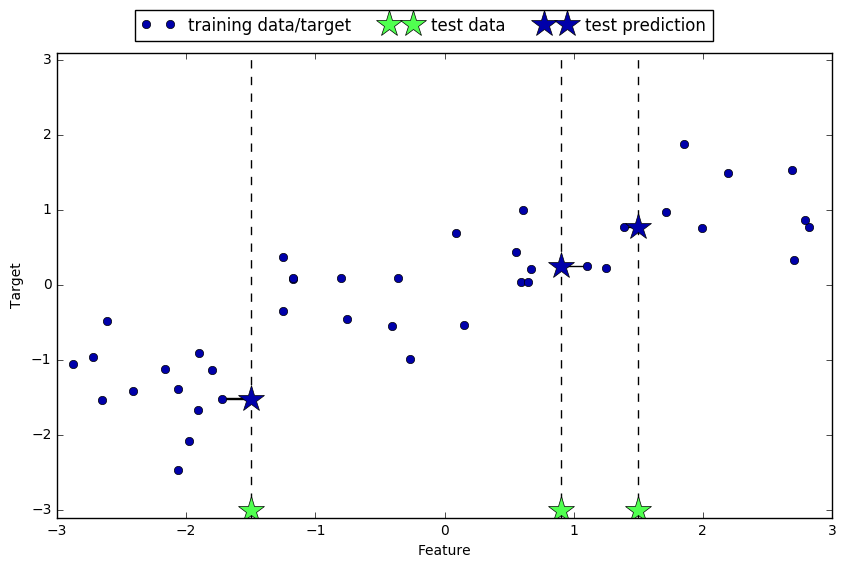

In [34]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

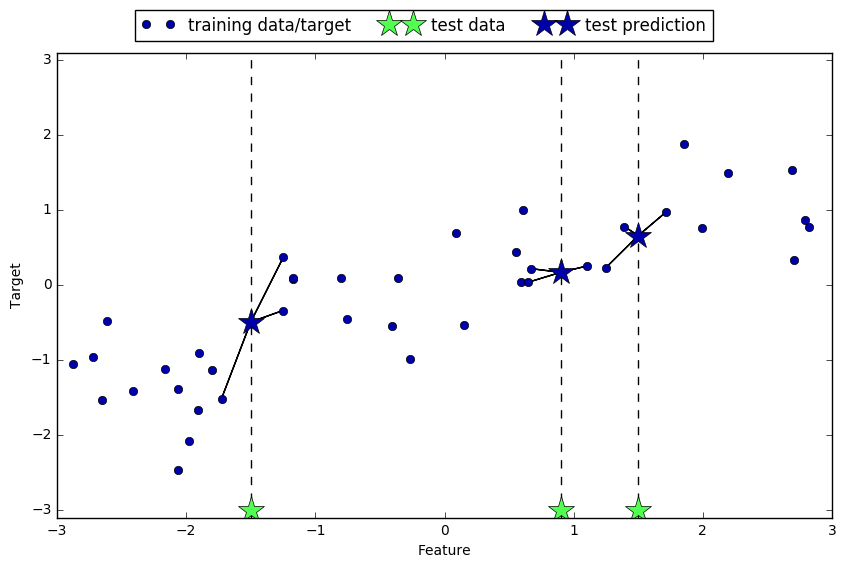

In [35]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

To use k-neighbors regression model, one should instantiate a **KNeighborsRegressor** class in scikit-learn.

In [36]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Instantiate the model and set the number of neighbors to 3
reg = KNeighborsRegressor(n_neighbors=3)
# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [37]:
print("Test set predictions: {}".format(reg.predict(X_test)))

Test set predictions: [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


The *.score()* method for KNeighborsRegressor returns the R-square of the model, with 1 representing a perfect prediction and 0 representing a constant target value regardless of the feature values.

In [39]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


To visualize the changes in the model when *k* increases, we compare k-Neighbors Regressor model when k equals 1, 3, and 9.

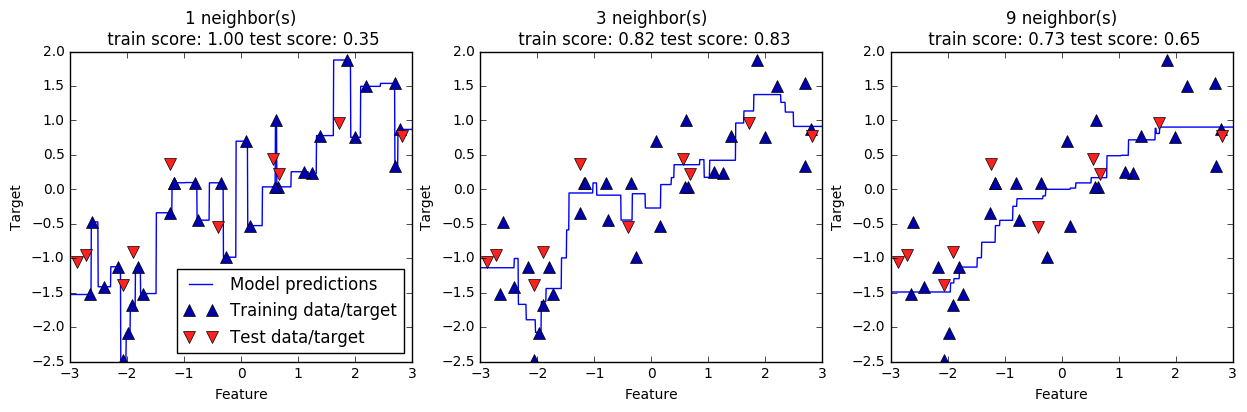

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, "^", c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
            "Test data/target"], loc="best")

The predicted line becomes significantly smoother when the count of neighbors increases. It signifies a reduction in complexity compared to 1-NR and 3-NR.

We can then move forward to use similar methods to evaluate the **"sweet spot"** for *k* value in this model.

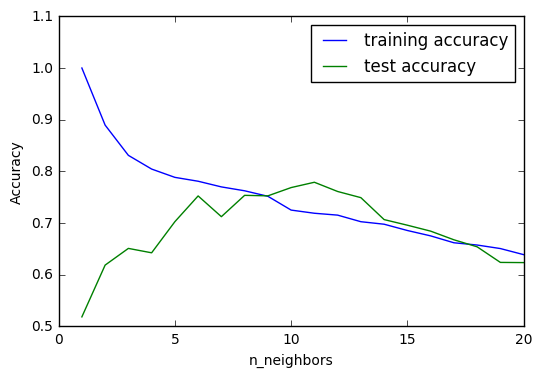

In [45]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=100)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=608)
# Create training and testing datasets

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 21)

for n_neighbors in neighbors_settings:
    # build the model
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    # record training accuracy
    training_accuracy.append(reg.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(reg.score(X_test, y_test))

plt.plot(neighbors_settings,
         training_accuracy, label="training accuracy")
plt.plot(neighbors_settings,
        test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

We can observe from above graph that the increase of *k* result in a reduction in training accuracy. It is also interesting to see that the accuracy for test set increases significantly, to a point it even surpasses training set accuracy. It certainly seems that at the point where *k* equals around 10 we can see the best model setting for k-NR.

## 1.4 k-NN pros and cons

**Parameters of k-NN**
> In principle, there are **two important parameters** to the KNeighbors classifier: the
**number of neighbors** and **how you measure distance between data points**. In practice,
using a small number of neighbors like three or five often works well, but you should
certainly adjust this parameter.

**Pros**
> One of the strengths of k-NN is that the **model is very easy to understand**, and often
**gives reasonable performance** without a lot of adjustments. Using this algorithm is a
**good baseline method** to try before considering more advanced techniques.

**Cons**
>Building
the nearest neighbors model is usually very fast, but when your **training set is very
large** (either in number of features or in number of samples) **prediction can be slow**.

> This approach often does not perform well on **datasets with many features**
(hundreds or more), and it does particularly badly with datasets where most features
are 0 most of the time (so-called **sparse datasets**). Therefore this model is not good for practices such as text mining.
